## Import packages

In [1]:
import os,sys
sys.path.append(os.path.abspath(".."))

from HW3.helpers_part_b import *
import matplotlib.pyplot as plt

## Kaggle: Resample datasets and save

In [2]:
kaggle_resample()

Saved: data_hourly/kaggle_House_01.csv
Saved: data_hourly/kaggle_House_10.csv
Saved: data_hourly/kaggle_House_11.csv
Saved: data_hourly/kaggle_House_12.csv
Saved: data_hourly/kaggle_House_13.csv
Saved: data_hourly/kaggle_House_15.csv
Saved: data_hourly/kaggle_House_16.csv
Saved: data_hourly/kaggle_House_17.csv
Saved: data_hourly/kaggle_House_18.csv
Saved: data_hourly/kaggle_House_19.csv
Saved: data_hourly/kaggle_House_02.csv
Saved: data_hourly/kaggle_House_20.csv
Saved: data_hourly/kaggle_House_21.csv
Saved: data_hourly/kaggle_House_03.csv
Saved: data_hourly/kaggle_House_04.csv
Saved: data_hourly/kaggle_House_05.csv
Saved: data_hourly/kaggle_House_06.csv
Saved: data_hourly/kaggle_House_07.csv
Saved: data_hourly/kaggle_House_08.csv
Saved: data_hourly/kaggle_House_09.csv


## UKEDC: House-wisely aggregate ```dat``` series into single ```csv```

In [3]:
ukedc_to_csv()

Saved: data_ukedc/csv/house_1/01-aggregate.csv
Saved: data_ukedc/csv/house_1/10-kettle.csv
Saved: data_ukedc/csv/house_1/11-toaster.csv
Saved: data_ukedc/csv/house_1/12-fridge.csv
Saved: data_ukedc/csv/house_1/13-microwave.csv
Saved: data_ukedc/csv/house_1/14-lcd_office.csv
Saved: data_ukedc/csv/house_1/15-hifi_office.csv
Saved: data_ukedc/csv/house_1/16-breadmaker.csv
Saved: data_ukedc/csv/house_1/17-amp_livingroom.csv
Saved: data_ukedc/csv/house_1/18-adsl_router.csv
Saved: data_ukedc/csv/house_1/19-livingroom_s_lamp.csv
Saved: data_ukedc/csv/house_1/02-boiler.csv
Saved: data_ukedc/csv/house_1/20-soldering_iron.csv
Saved: data_ukedc/csv/house_1/21-gigE_&_USBhub.csv
Saved: data_ukedc/csv/house_1/22-hoover.csv
Saved: data_ukedc/csv/house_1/23-kitchen_dt_lamp.csv
Saved: data_ukedc/csv/house_1/24-bedroom_ds_lamp.csv
Saved: data_ukedc/csv/house_1/25-lighting_circuit.csv
Saved: data_ukedc/csv/house_1/26-livingroom_s_lamp2.csv
Saved: data_ukedc/csv/house_1/27-iPad_charger.csv
Saved: data_uke

## UKEDC: Resample from aggregated ```csv``` and save

In [5]:
ukedc_resample()

Saved: data_hourly/ukedc_House_01.csv
Saved: data_hourly/ukedc_House_02.csv
Saved: data_hourly/ukedc_House_03.csv
Saved: data_hourly/ukedc_House_04.csv


## Read hourly resampled datasets
```NaN``` midpoints are interpolated using nearest values  
```NaN``` initial/end points are filled with 0

In [43]:
datasets = read_sum_resampled()
kaggle, ukedc = datasets

## Compute yearly sum of all real power consumptions for each house

In [44]:
datasets_y = yearly_sum(datasets)
kaggle_y, ukedc_y = datasets_y

## Visualize house-wise hourly real power consumptions

/var/folders/rz/v0sc2vjs4tg463dpn13r3qn00000gn/T/ipykernel_92188/1258958449.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 3))


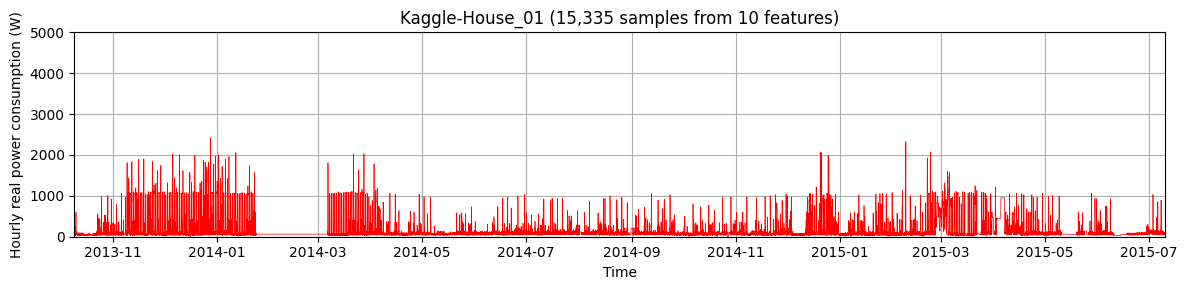

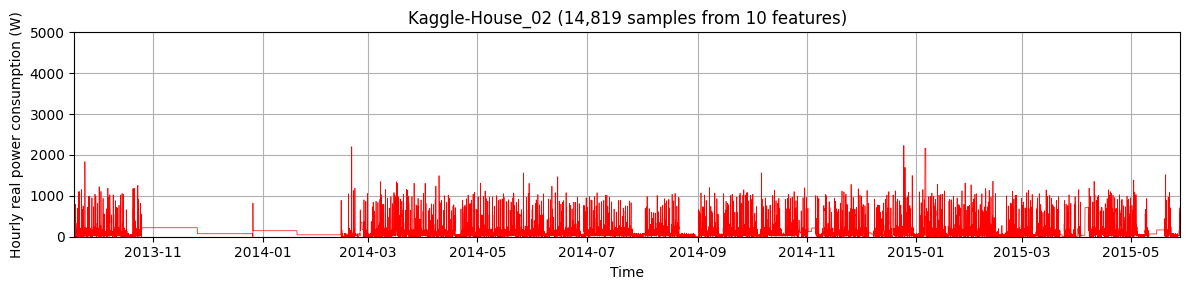

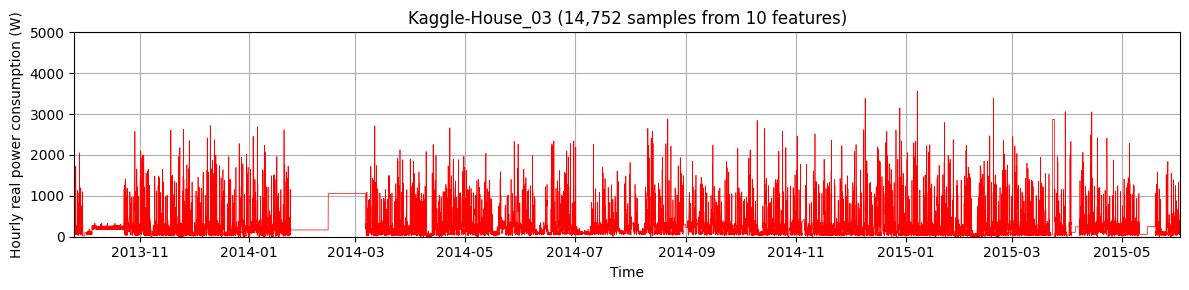

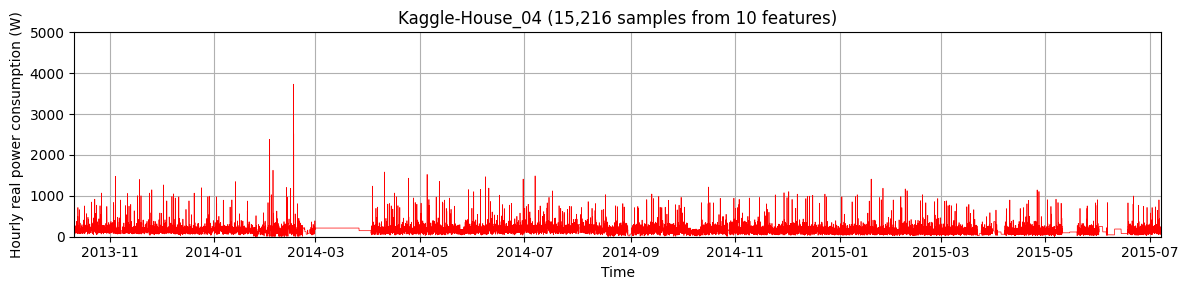

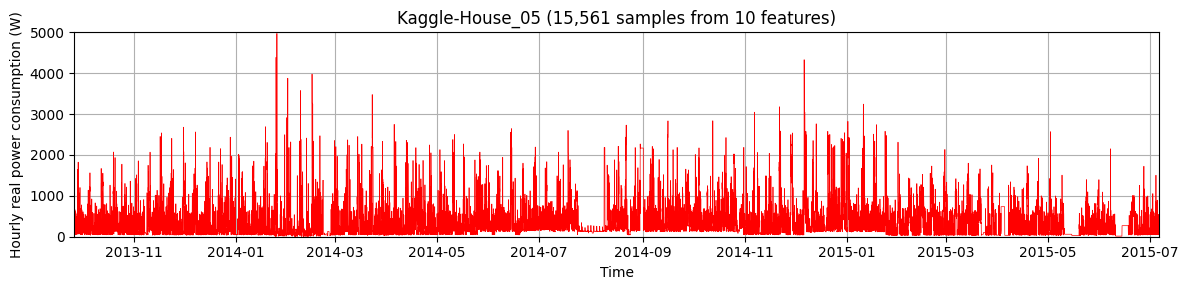

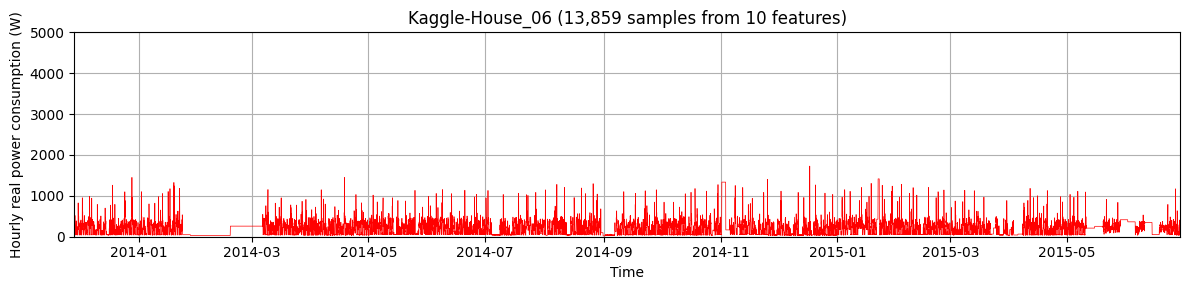

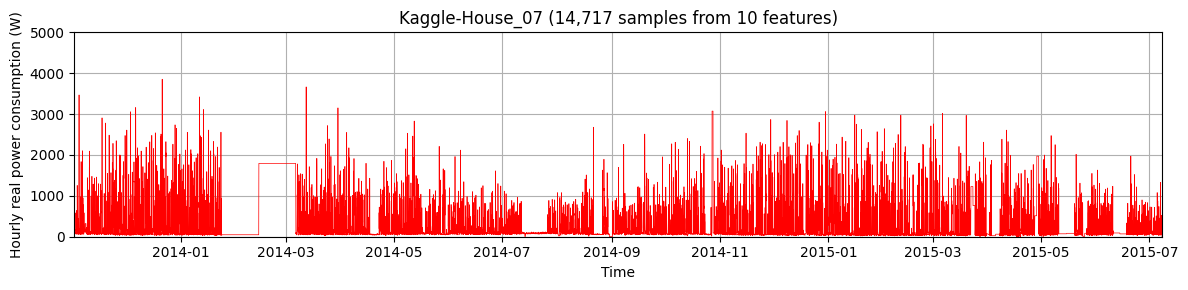

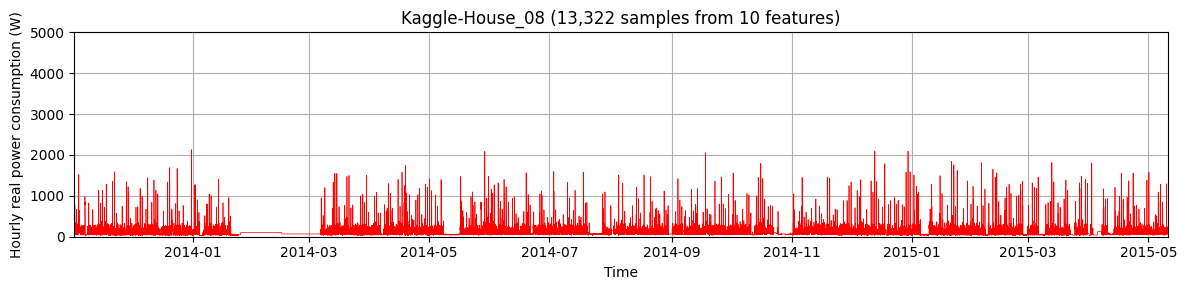

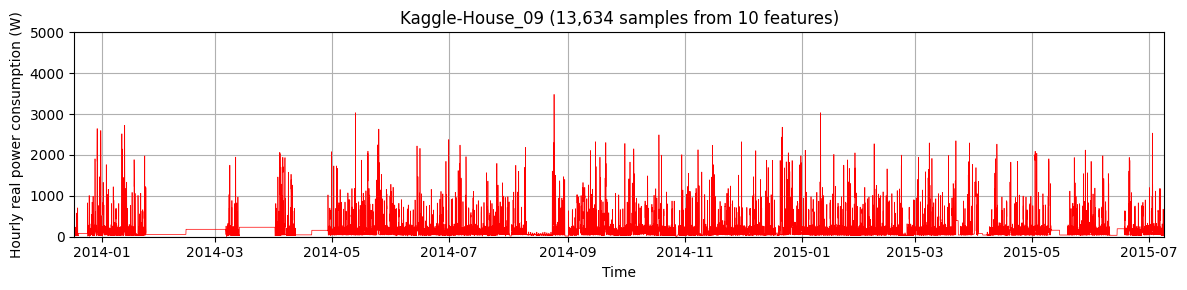

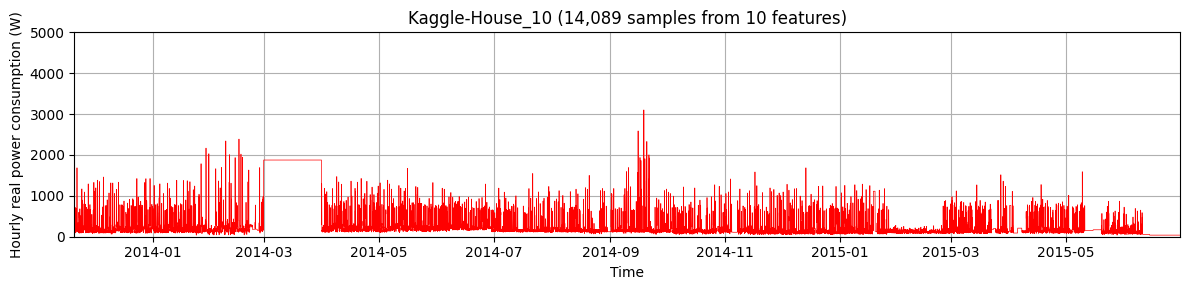

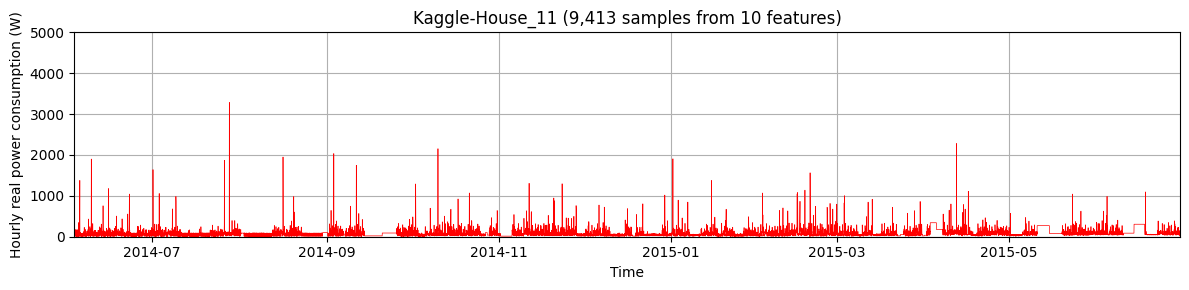

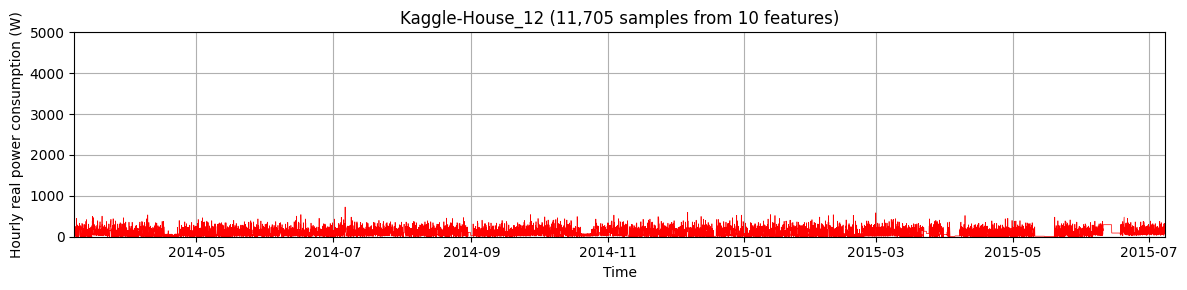

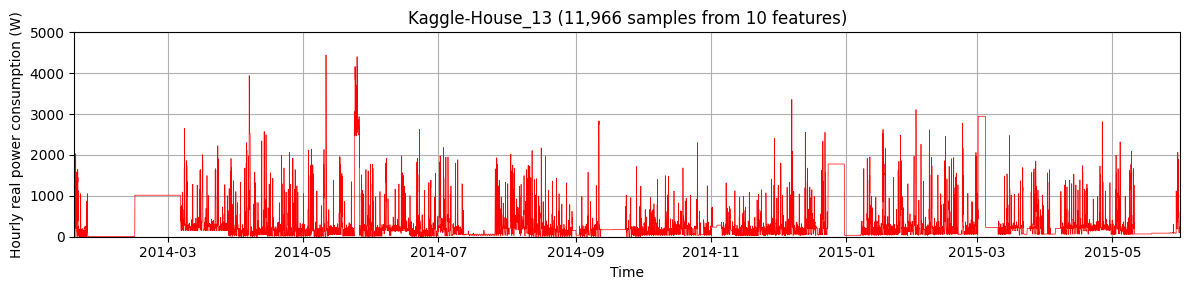

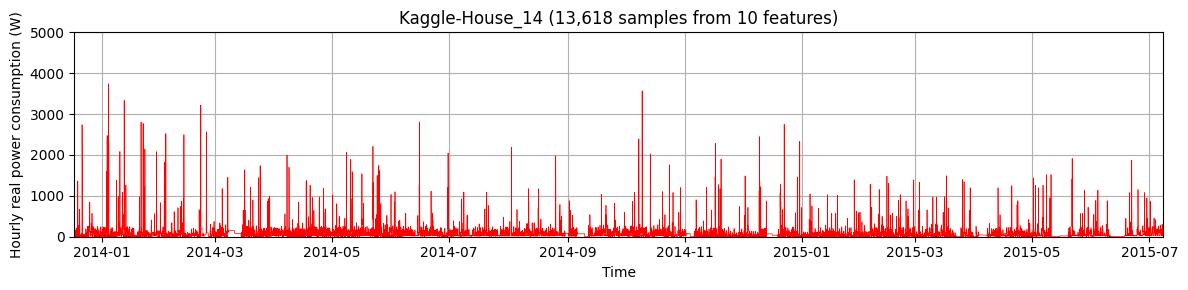

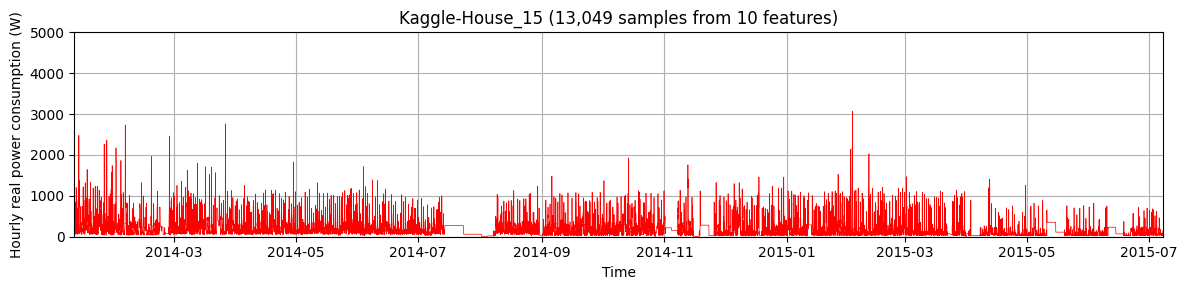

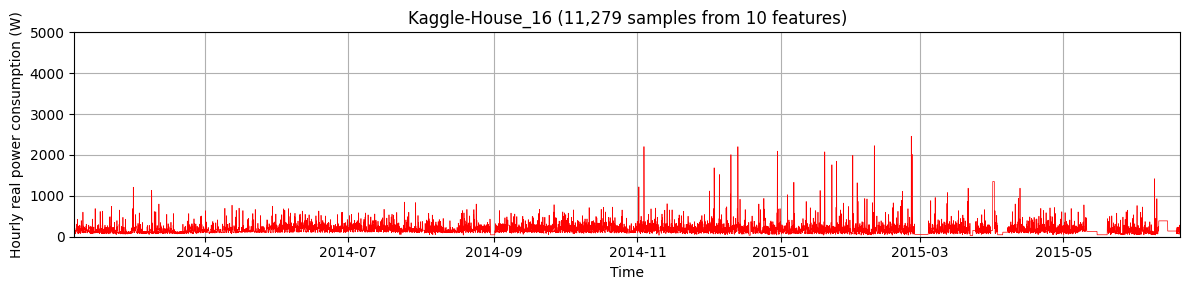

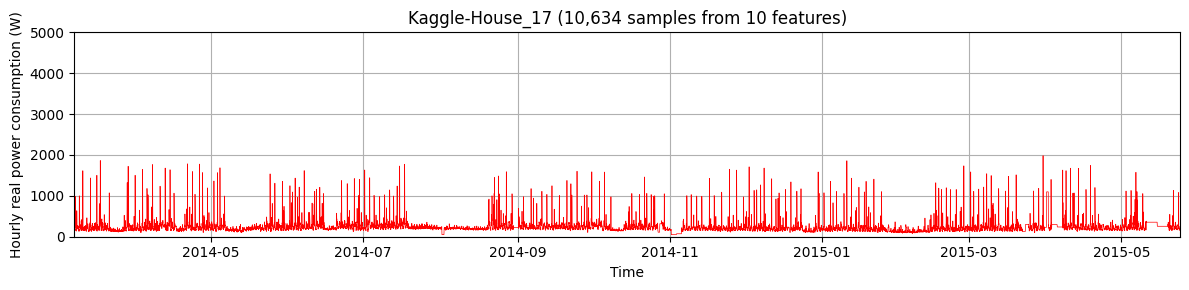

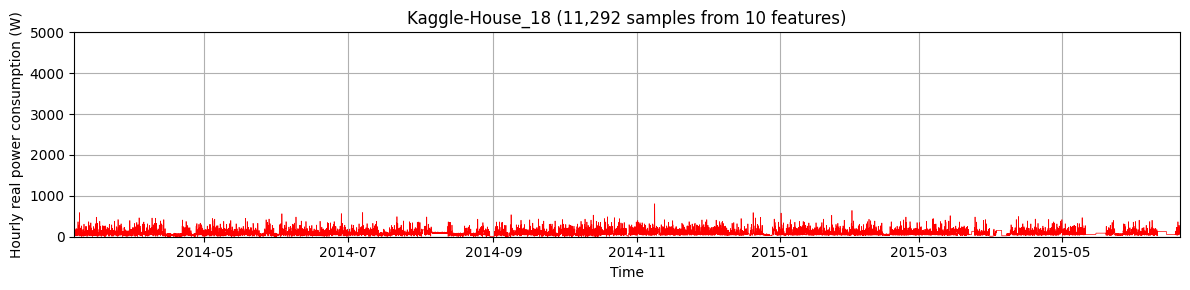

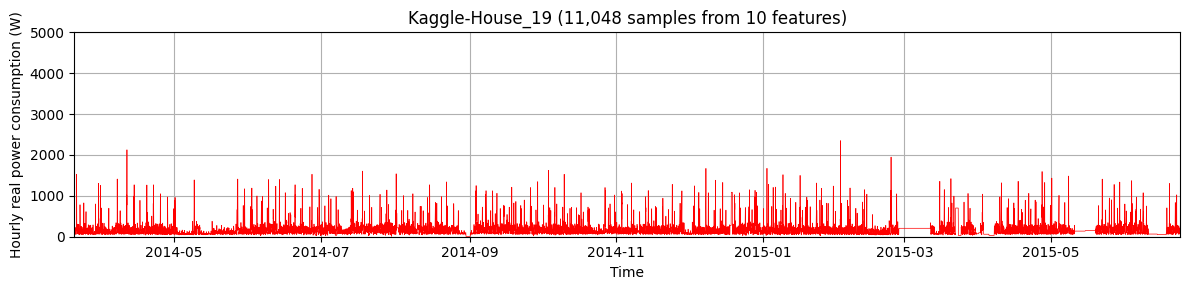

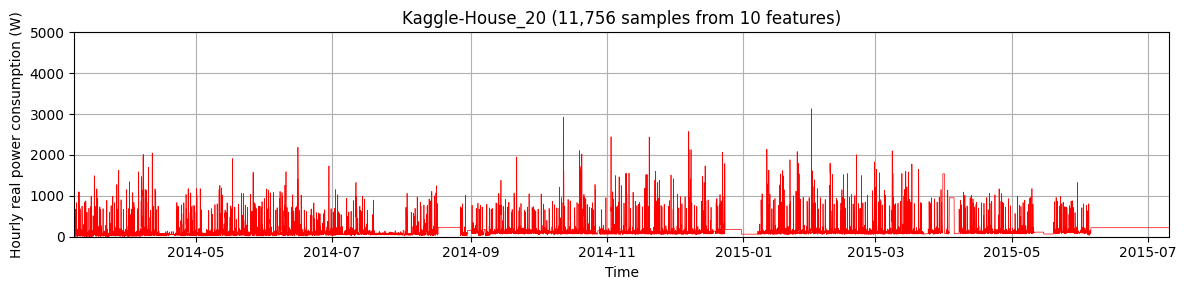

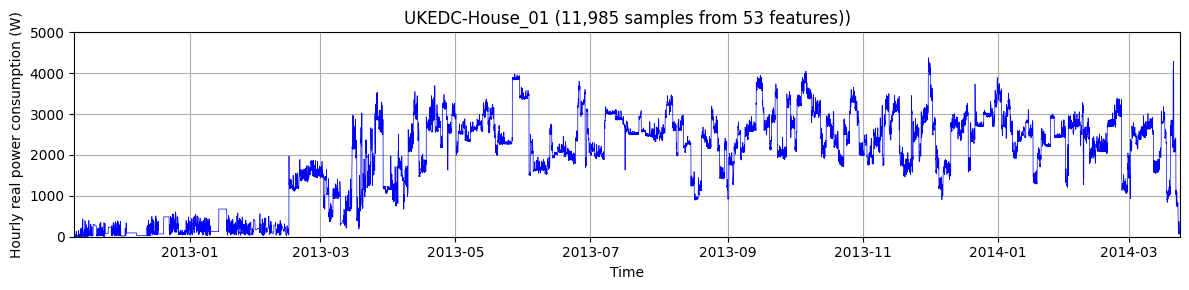

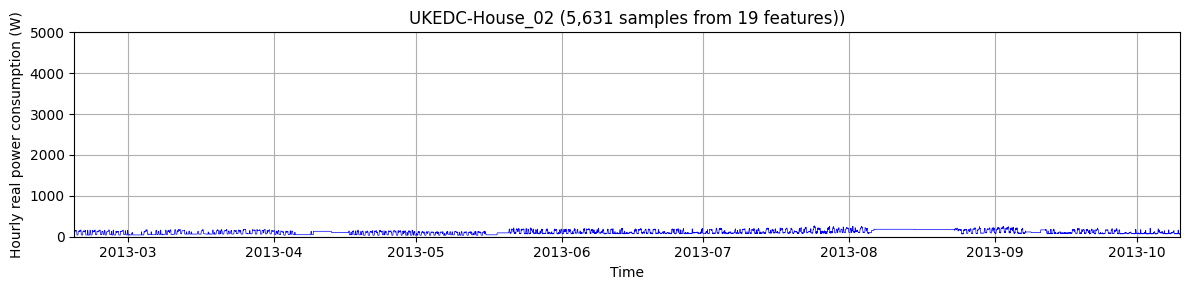

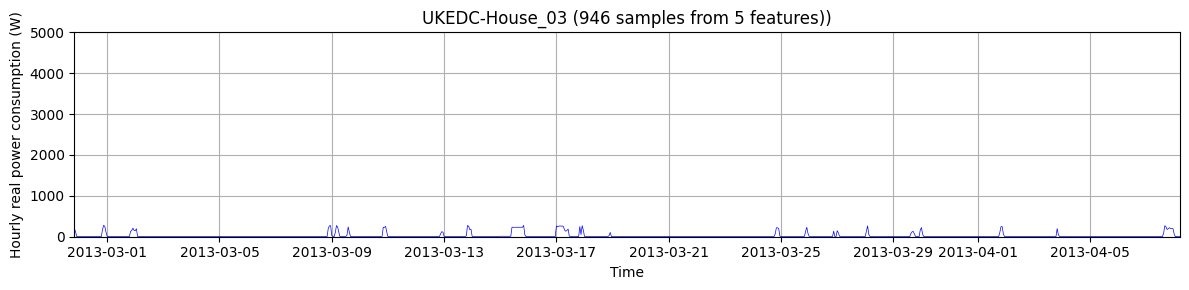

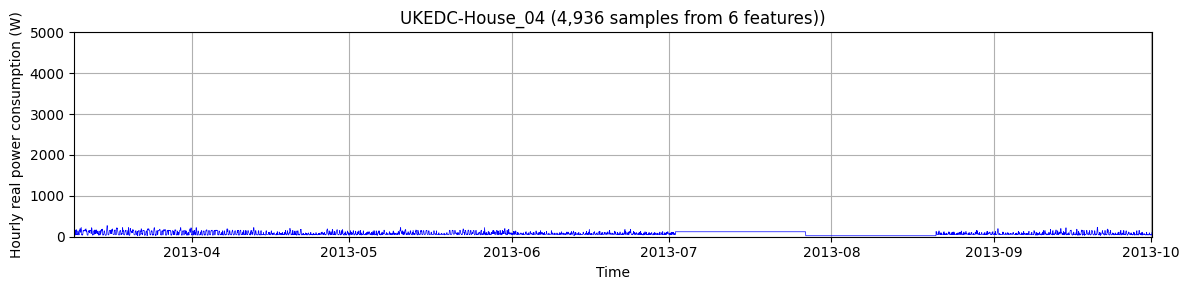

In [5]:
for i, d in enumerate(kaggle):
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(d.index, d["total"], c="red", lw=0.5)
    ax.set_title(f"Kaggle-House_{i+1:02d} ({len(d.index):,} samples from {d.shape[1]-2} features)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Hourly real power consumption (W)")
    ax.set_xlim(d.index[0], d.index[-1])
    ax.set_ylim(0,5000)
    ax.grid()
    fig.tight_layout()
for i, d in enumerate(ukedc):
    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(d.index, d["total"], c="blue", lw=0.5)
    ax.set_title(f"UKEDC-House_{i+1:02d} ({len(d.index):,} samples from {d.shape[1]-1} features))")
    ax.set_xlabel("Time")
    ax.set_ylabel("Hourly real power consumption (W)")
    ax.set_xlim(d.index[0], d.index[-1])
    ax.set_ylim(0,5000)
    ax.grid()
    fig.tight_layout()
plt.show()

## Visualize house-wise yearly real power consumptions for each year

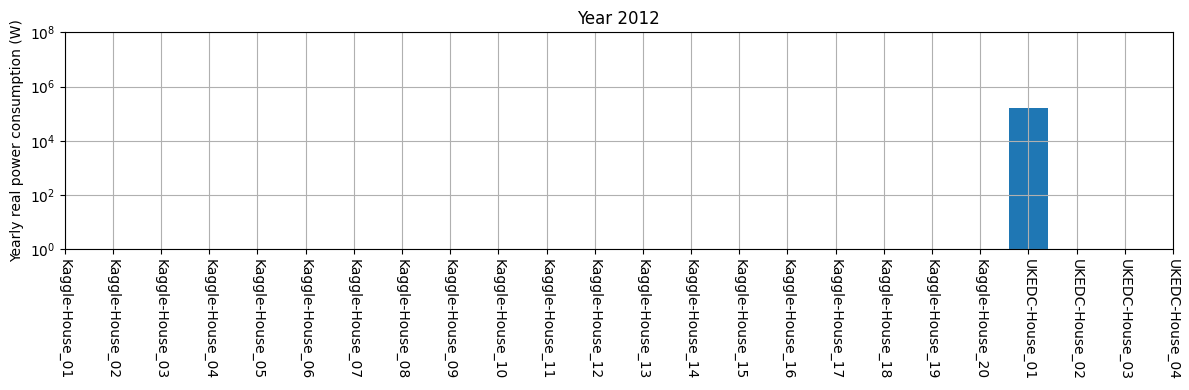

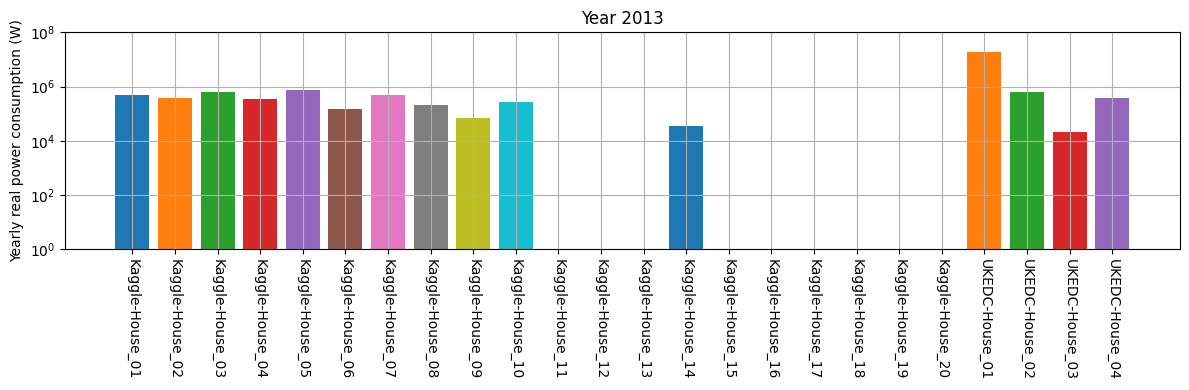

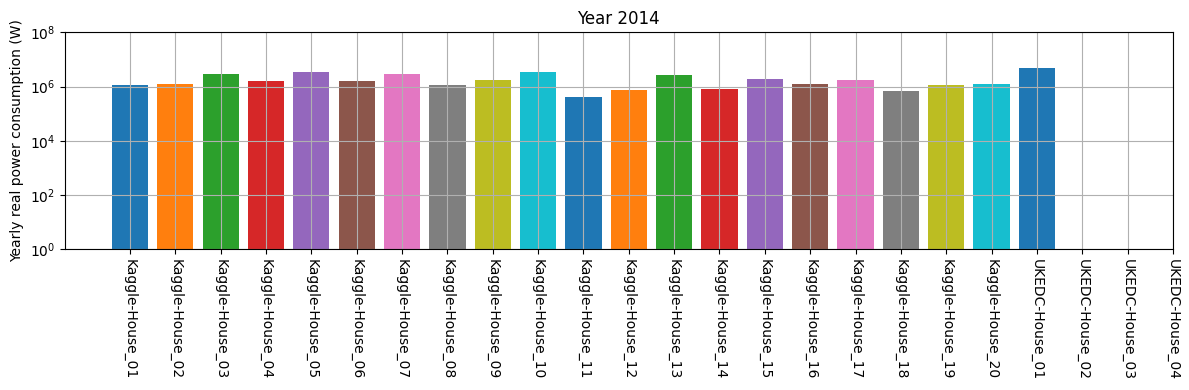

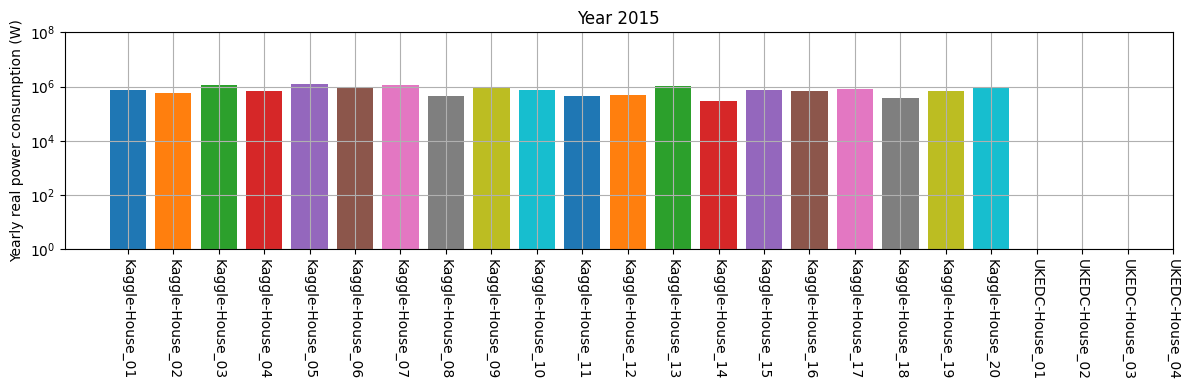

In [45]:
years = [2012, 2013, 2014, 2015]
names = [f"Kaggle-House_{i+1:02d}" for i in range(len(kaggle_y))] + [
    f"UKEDC-House_{i+1:02d}" for i in range(len(ukedc_y))
]

for y in years:
    fig, ax = plt.subplots(figsize=(12, 4))
    for i, d in enumerate(kaggle_y + ukedc_y):
        try:
            ax.bar(i, d[["total"]].loc[f"{y}-12-31"])
        except KeyError:
            continue
    ax.set_xticks(range(len(kaggle_y + ukedc_y)))
    ax.set_xticklabels(names, rotation=-90)
    ax.set_ylabel("Yearly real power consumption (W)")
    ax.set_ylim(1e0, 1e8)
    ax.set_yscale("log")
    ax.set_title(f"Year {y}")
    ax.grid()
    fig.tight_layout()